In [9]:
from datasets import load_from_disk, load_metric
import numpy as np
metric = load_metric("accuracy")
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def compute_metrics(eval_pred): # this part prob wont work, parameter should be removed from trainer probably
    try:
        logits, labels, inputs = eval_pred
    except:
        logits, labels = eval_pred
    predictions = np.argmax(logits[0], axis=-1)
    print (classification_report(predictions, labels))
    return metric.compute(predictions=predictions, references=labels)
#compute_metrics(preds)
import pandas as pd
#prediction = pd.DataFrame(preds)
#display(prediction)
predictions = pd.read_csv('plbart_preds_no_mistake_i_guess.csv')
test_plbart_dataset = load_from_disk('datasets/plbart_test.hf')
true_labels =  (test_plbart_dataset['labels'])
for i in range(0, len(true_labels)):
   true_labels[i] = true_labels[i] +1
pred_labels =  (predictions['0'].values)
print (classification_report(pred_labels, true_labels))
#predictions.drop(columns = predictions.columns[0], axis = 1, inplace= True)
#print(sum(p.numel() for p in model.parameters()))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     43010
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/data/users/ksmunson/data/users/ksmunson/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/users/ksmunson/data/users/ksmunson/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/users/ksmunson/data/users/ksmunson/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,20)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     33350
           1       0.68      0.87      0.77       107
           2       0.67      0.72      0.69       148
           3       0.78      0.76      0.77       105
           4       0.50      0.61      0.55        80
           5       0.60      0.66      0.63       172
           6       0.70      0.76      0.72       214
           7       0.66      0.73      0.70       694
           8       1.00      1.00      1.00      1006
           9       0.90      0.84      0.87       285
          10       0.42      0.69      0.52       126
          11       0.65      0.71      0.68      1016
          12       0.87      0.93      0.90       485
          13       0.73      0.76      0.74       111
          14       0.44      0.46      0.45       160
          15       0.67      0.79      0.72       151
          16       0.46      0.55      0.50       142
          17       0.67    

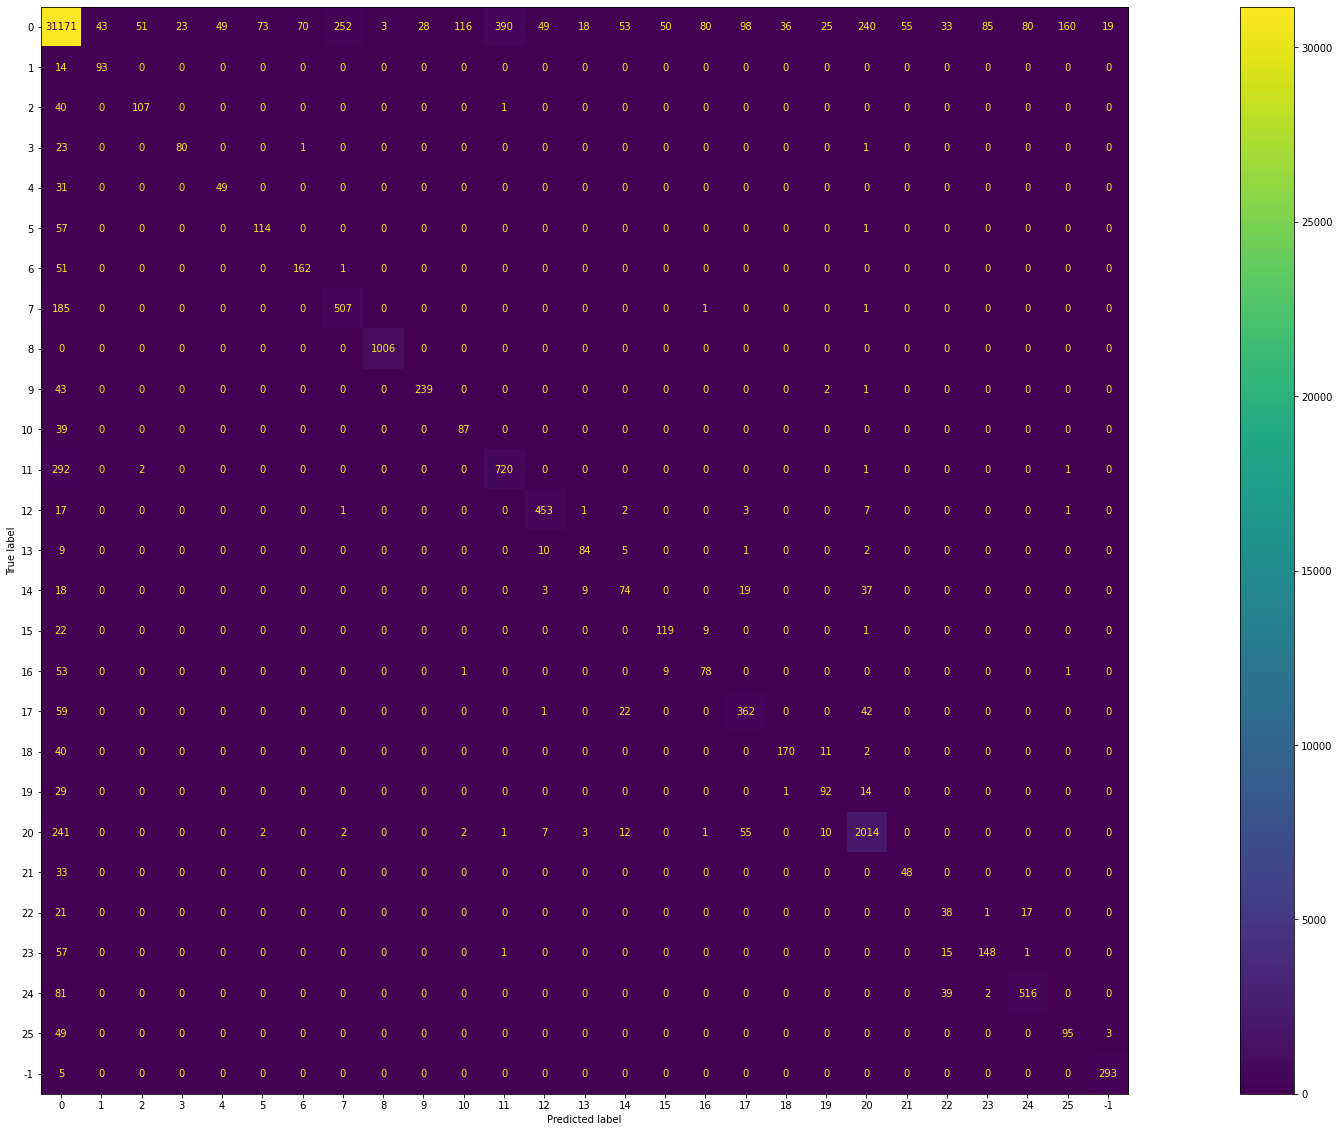

In [28]:
#!pip list
#!pip install matplotlib



predictions_t5 = pd.read_csv('codet5_results/codet5_preds.csv')
test_t5_dataset = load_from_disk('datasets/codet5_test.hf')
true_labels =  (test_t5_dataset['labels'])
classes = set(true_labels)
for i in range(0, len(true_labels)):
   true_labels[i] = true_labels[i] +1
pred_labels =  (predictions_t5['0'].values)
classes = set(true_labels)
print (classification_report(pred_labels, true_labels))
cm = (confusion_matrix(pred_labels, true_labels))
print (cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()